# How global warming is affecting temperatures? 
In climate change studies, temperature anomalies are more important than absolute temperature. A temperature anomaly is the difference from an average, or baseline, temperature. A positive anomaly indicates the observed temperature was warmer than the baseline, while a negative anomaly indicates the observed temperature was cooler than the baseline.

![NASA](https://climate.nasa.gov/system/content_pages/main_images/203_co2-graph-021116.jpeg)

According to NASA, the Earth's climate has changed throughout history. Most of these climate changes are attributed to very small variations in Earth’s orbit that change the amount of solar energy our planet receive. 
The current warming trend is of particular significance because most of it is extremely likely to be the result of human activity since the mid-20th century and proceeding at a rate that is unprecedented over decades to millennial.[](http://)

## Analysis

In this notebook temperature variations over years are under study. 

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import os 
%matplotlib inline
print(os.listdir("../input"))


In [ ]:
# Reading the input file and storing it as dataframe #
file_name = "../input/global-historical-climatology-network/ghcn-m-v1.csv"
df = pd.read_csv(file_name, na_values=[-9999])
df.fillna(0, inplace=True)   # filling the NA values with 0
df.shape

In [ ]:
co2 = pd.read_csv("../input/co2-emissions/co2.csv",skiprows = 3)
co2.head()

**Temperature anomalies in 1994:**

I was born on 1994, a good year for our generations. PlayStation was released, Nelson Mandela sworn in as South Africa's 1st black president, Amazon.com was founded by Jeff Bezos, etc. 
But this year was also remembered because sad events like the Kosovo War and Rwanda Genocide. But, looking throught the temperature anomalies how was this year? 
* Now let us plot the temperature anomalies in 1994 at different parts of the world for the month on January.

In [5]:
# helper function #
def getTemperature(year, month):
    temp_df = df.ix[df.year==year]
    temp_df = temp_df.ix[temp_df.month==month]
    return np.array(temp_df.iloc[:,3:]) / 100.

lons = np.array([-180, -175, -170, -165, -160, -155, -150, -145, -140, -135, -130, -125, -120, -115, -110, -105, -100, -95, -90, -85, -80, -75, -70, -65, -60, -55, -50, -45, -40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180])
lats = np.array([90, 85, 80, 75, 70, 65, 60, 55, 50, 45, 40, 35, 30, 25, 20, 15, 10, 5, 0, -5, -10, -15, -20, -25, -30, -35, -40, -45, -50, -55, -60, -65, -70, -75, -80, -85, -90])
lons, lats = np.meshgrid(lons, lats)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


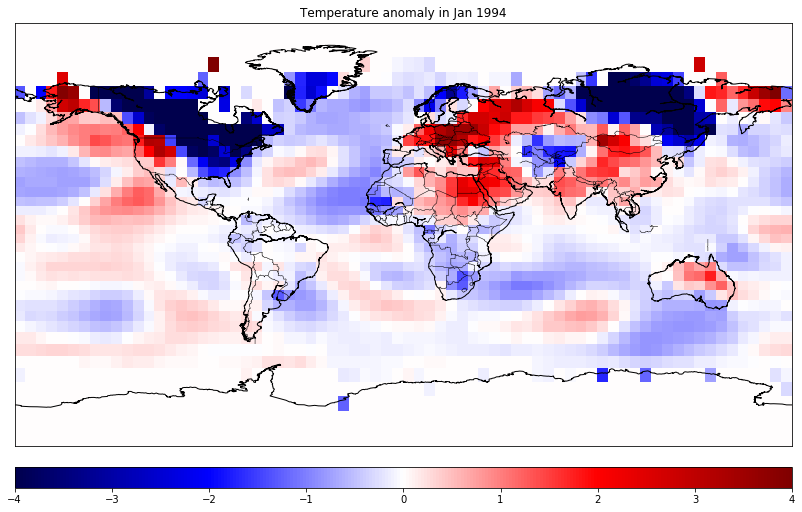

In [6]:
# get the temperature for Jan 1994 #
temperature = getTemperature(1994, 1)
temperature[temperature<-4] = -4
temperature[temperature>4] = 4

# create figure, axes instances.
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0.05,0.05,0.9,0.9])

# create a base map with 
m = Basemap(projection='gall',
              llcrnrlon = -180,              # lower-left corner longitude
              llcrnrlat = -90,               # lower-left corner latitude
              urcrnrlon = 180,               # upper-right corner longitude
              urcrnrlat = 90,               # upper-right corner latitude
              resolution = 'l',
              area_thresh = 1000000.0
              )
m.drawcoastlines()
m.drawcountries()

# plot sst, then ice with pcolor
im = m.pcolormesh(lons,lats,temperature,shading='flat',cmap=plt.cm.seismic,latlon=True)

# add colorbar
cb = m.colorbar(im,"bottom", size="5%", pad="5%")
# add a title.
ax.set_title('Temperature anomaly in Jan 1994')
plt.show()

There are quite a few changes. Temperature anomalies have raised a lot in Northern America and Northern Russia. Temperature is high on certain parts of central Asia as well along with Greenland. 

**Animation:**

Now let us use an animation to see how the temperature anomalies have changed over years. 

In [ ]:
import matplotlib.animation as animation

years = range(1990, 2017, 1)
# get the temperature for Jan 1880#
temperature = getTemperature(1990, 7)
temperature[temperature<-5] = -5
temperature[temperature>5] = 5
# create figure, axes instances.
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0.05,0.05,0.9,0.9])
# create a base map with 
m = Basemap(projection='gall',
              llcrnrlon = -180,              # lower-left corner longitude
              llcrnrlat = -60,               # lower-left corner latitude
              urcrnrlon = 180,               # upper-right corner longitude
              urcrnrlat = 90,               # upper-right corner latitude
              resolution = 'l',
              area_thresh = 1000000.0
              )
m.drawcoastlines()
m.drawcountries()
# plot sst, then ice with pcolor
im = m.pcolormesh(lons,lats,temperature,shading='flat',cmap=plt.cm.seismic,latlon=True)
# add colorbar
cb = m.colorbar(im,"bottom", size="5%", pad="5%")
# add a title.
ax.set_title('Temperature anomaly in July 1880')
ax.set_xlabel("Temperature differences (ºC)")


def updatefig(ind):
    year = years[ind]
    temperature = getTemperature(year, 7)
    temperature[temperature<-5] = -5
    temperature[temperature>5] = 5
    m.pcolormesh(lons,lats,temperature,shading='flat',cmap=plt.cm.seismic,latlon=True)
    ax.set_title('Temperature anomaly in July '+str(year))
    ax.set_xlabel("Temperature differences (ºC)")
    return im,

ani = animation.FuncAnimation(fig, updatefig, frames=len(years))
ani.save('lb.gif', fps=0.33, writer='imagemagick')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This i

**Please check the animation in the ouput tab**

In [ ]:
co2.info()